# Analysing Product Reviews by Shoppers



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
df=pd.read_csv('/content/gdrive/My Drive/GrammarandProductReviews.csv')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## EDA

In [ ]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,2018-02-04T07:28:12Z,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,NaN,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-23T02:53:06Z,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-06T04:49:31Z,2017-08-23T10:37:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [ ]:
df.shape

(71044, 25)

In [ ]:
df=df[['name','reviews.rating','reviews.text','reviews.title','reviews.didPurchase']]
df.head()

,name,reviews.rating,reviews.text,reviews.title,reviews.didPurchase
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Just Awesome,NaN
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Good,True
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Good,True
3,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Disappointed,False
4,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Irritation,False


In [ ]:
df.shape

(71044, 5)

In [ ]:
#checking null values
df.isnull().sum()

name                       0
reviews.rating             0
reviews.text              36
reviews.title            476
reviews.didPurchase    38886
dtype: int64

Text(0.5, 1.0, 'Reviews Ratings')

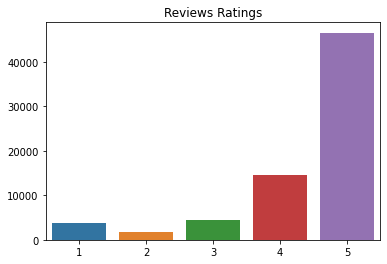

In [ ]:
data = df['reviews.rating'].value_counts()
sns.barplot(x=data.index, y=data.values).set_title('Reviews Ratings')

Text(0.5, 1.0, 'Reviews Purchase')

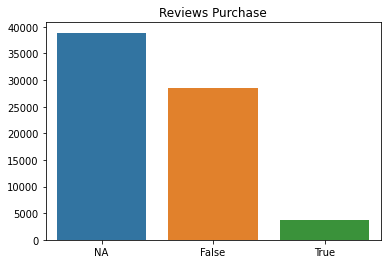

In [ ]:
df['reviews.didPurchase'] = df['reviews.didPurchase'].fillna('NA')
data = df['reviews.didPurchase'].value_counts()
sns.barplot(x=data.index, y=data.values).set_title('Reviews Purchase')

In [ ]:
#removing null values
df.dropna(inplace=True)
df.isnull().sum()

name                   0
reviews.rating         0
reviews.text           0
reviews.title          0
reviews.didPurchase    0
dtype: int64

In [ ]:
# selecting only those products that have atleast 500 reviews 
df=df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))
print('shape',df.shape)

Number of products=> 27
shape (52991, 5)


In [ ]:
df.head()

,name,reviews.rating,reviews.text,reviews.title,reviews.didPurchase
0,Olay Regenerist Deep Hydration Regenerating Cream,1,This cream did not do much for my face or thro...,Gave it a Try,False
1,Olay Regenerist Deep Hydration Regenerating Cream,1,I used (and loved) this product for several ye...,New formula is terrible,False
2,Olay Regenerist Deep Hydration Regenerating Cream,1,I have been using Oil of Olay for over 20 year...,PLEASE BRING BACK OLD FORMULA!!!,False
3,Olay Regenerist Deep Hydration Regenerating Cream,1,I am so disappointed! I have used this product...,Please bring back the old formula,False
4,Olay Regenerist Deep Hydration Regenerating Cream,1,I've been using this product for years and it ...,What happened!!,False


# Cleaning text Data

In [ ]:
import re

def clean_text(text):
    """Make text lowercase, 
       remove text in angle brackets,
       remove \n,
       remove punctuation and 
       remove words containing numbers."""
    # lower case
    text = str(text).lower() 
    
    # remove text in angle brackets
    text = re.sub('<.*?>+', '', text).strip()
    
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text).strip()
    
    #remove newline character
    text = re.sub('\n', ' ', text).strip()
    
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text).strip()
    
    return text

In [ ]:
df['reviews.title']=df['reviews.title'].apply(lambda x:clean_text(x))
for i in enumerate(df['reviews.title'].head()):
    print(f'review {i}')

review (0, 'gave it a try')
review (1, 'new formula is terrible')
review (2, 'please bring back old formula')
review (3, 'please bring back the old formula')
review (4, 'what happened')


In [ ]:
df['reviews.text']=df['reviews.text'].apply(lambda x:clean_text(x))
for i in enumerate(df['reviews.text'].head(5)):
    print(f'review {i}')


review (0, 'this cream did not do much for my face or throat area i have gone back to my generic brand it works better and is not as expensive this review was collected as part of a promotion')
review (1, 'i used and loved this product for several years until they changed it it used to moisturize my skin and left it feeling soft now it sits on top of my skin and is never absorbed it just leaves a slimy film on my skin i will no longer purchase this product')
review (2, 'i have been using oil of olay for over  years this product worked so well for me but the new formula is horrible i cannot find anything to work for my skin like it did the smell is flowery and it is too thick the old formula was so light')
review (3, 'i am so disappointed i have used this product for years because of its soft smell and great results the new formula feels greasy smells awful and i dont feel like my skin looks as toned and wrinkle free anymore this was a five star product for so many yearswhy change it pl

## Finding Top Rated Product names

In [ ]:
top_products=df[['name','reviews.rating','reviews.text','reviews.title','reviews.didPurchase']][df['reviews.rating']>3]
top_products.head()

,name,reviews.rating,reviews.text,reviews.title,reviews.didPurchase
38,Olay Regenerist Deep Hydration Regenerating Cream,4,its keeps your face feeling moisturizer and so...,this product has good features,False
39,Olay Regenerist Deep Hydration Regenerating Cream,4,it hydrates my skin it is not too thick and he...,hydrating but not too heavy,False
40,Olay Regenerist Deep Hydration Regenerating Cream,4,this product goes on smooth and makes your ski...,super,False
41,Olay Regenerist Deep Hydration Regenerating Cream,4,i have tried other products and the regenerist...,regenerist,False
42,Olay Regenerist Deep Hydration Regenerating Cream,4,really like the feel of the product and smooth...,really hydrats,False


In [ ]:
import plotly.express as px
top10_products = pd.DataFrame(top_products.groupby(by='name')['reviews.rating'].count().nlargest(10).sort_values(ascending = True))
fig = px.bar(top10_products, x = 'reviews.rating', y = top10_products.index, height = 600, color = 'reviews.rating', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 10 product based on rating greater than 3')
fig.show()

In [ ]:
#most popular product
top_prod_ = pd.DataFrame(top_products.groupby(by='name')['reviews.rating'].count().nlargest(1).sort_values(ascending = False))
top_prod_

,reviews.rating
name,
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8507


## Find 3 reasons in top-rated comments why people liked it

In [ ]:
top_prod_reason=pd.DataFrame(top_products[top_products['name']=='Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total'])
top_prod_reason[:3]

,name,reviews.rating,reviews.text,reviews.title,reviews.didPurchase
3694,Clorox Disinfecting Wipes Value Pack Scented 1...,4,my favorite are the clorox that have the scrub...,using clorox,NA
3695,Clorox Disinfecting Wipes Value Pack Scented 1...,4,makes my life easy specially on the go with tw...,makes my life easy,NA
3696,Clorox Disinfecting Wipes Value Pack Scented 1...,4,for the busy mom on the go the health of my fa...,easy convenientwhat a mom loves,NA


## Bag Of Words

In [ ]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (4,4),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(top_prod_reason['reviews.text'])

print(text_counts.shape)

(8507, 64652)


In [ ]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df.head()

,aalot mess esay use,aanyhwere review collected promotion,abd removes stains bought,abilities makes easier clean,abilities review collected promotion,ability clean counter quickly,ability clean disifect review,ability clean review collected,ability clean sanitize home,ability coupled disinfecting fresh,ability disinfect review collected,ability easy use easy,ability fight stains love,ability good price clean,ability kill germs work,ability makes pleasure clean,ability quickly clean disinfect,ability review collected promotion,ability throw germs away,ability times review collected,able care minimal hassle,able children help clean,able clean ad especially,able clean bathroom effectively,able clean disinfect tight,able clean feel good,able clean mess review,able clean messes know,able clean messes review,able clean surfaces removed,able clean wipe does,able convience clean great,able daily slime grime,able disinfect clean simplicity,able disinfect countertops having,able disinfect definitely purchase,able disinfect home clean,able disinfect review collected,able drop bottle counter,able grab clorox wipe,...,youre rush like need,youre simply throw away,youre took nyc wouldnt,youre using separate cleaner,youve cleaned disinfected using,youve got kids making,youve tried review collected,yr old boy friends,yr old cleans bathroom,yr old constant struggle,yr old im cleaning,yr old son keepin,yr old son uses,yr old tends spread,yr old using argue,yr old wipe dn,yr old yr old,yuck minimum review collected,yuck smelled bad husband,yuck wants touch review,yuckiness lurks bathrooms room,yucky bathroom review collected,yucky going happen kids,yucky kidinfested house review,yucky messes know clean,yucky places landed shoes,yucky sponge ive used,yucky sponge sink wish,yucky time year review,yucky viruses left students,yummy clean leaves good,yyears old son review,zap review collected promotion,zero clorox wipes winners,ziploc bag purse disgusted,ziploc wipes hopped right,ziplock bag handy use,zone making feel great,zones plus love lemony,zoo easyfast clean review
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_rev_rat=top_prod_reason[['reviews.text','reviews.rating']]
data_rev_rat.shape

(8507, 2)

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords 
from collections import defaultdict
import gensim
import random

def remove_stopword(x):
    """Remove stopwords from the articles"""
    # import stopwords from gensim methods to stop_list variable
    gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS 
    stopwords_list = list(set(gensim_stopwords))     
    stopwords = stopwords_list 
    return [word for word in x if word not in stopwords]


def generate_ngrams(new, n_gram=1):
    """Generate n-gram words"""
    ngrams = zip(*[new[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]


def top_n_grams(new,N=20,n_gram=1):
    new['temp_list'] = new['reviews.text'].apply(lambda x:str(x).split())

    new['temp_list_stopw'] = new['temp_list'].apply(lambda x:remove_stopword(x))

    new_unigrams = defaultdict(int)

    for i in new['temp_list_stopw']:
        for word in generate_ngrams(i,n_gram):
            new_unigrams[word] += 1


    new_unigrams_df = pd.DataFrame(sorted(new_unigrams.items(), key=lambda x: x[1])[::-1])

    

    # bar graph Plot of top 20 common unigram 
    
    fig, axes = plt.subplots(figsize=(12,8))

    plt.tight_layout()

    sns.barplot(y=new_unigrams_df[0].values[:N], x=new_unigrams_df[1].values[:N], color='green')

    axes.spines['right'].set_visible(False)
    axes.set_xlabel('')
    axes.set_ylabel('')
    axes.tick_params(axis='x', labelsize=12)
    axes.tick_params(axis='y', labelsize=12)
    axes.set_title(f'Top {N} most common {n_gram}-grams in top1 product reviews', fontsize=15)
    plt.show()
    return new_unigrams

# Plot word cloud
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4',
              '#268bd2', '#2aa198', '#859900']
    return random.choice(colors)


def word_cloud(new_unigrams,ngram):
    fd = {
        'fontsize': '32',
        'fontweight' : 'normal',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center',
    }

    wc = WordCloud(width=2000, height=1000, collocations=False,
                   background_color="white",
                   color_func=col_func,
                   max_words=200,
                   random_state=np.random.randint(1, 8)).generate_from_frequencies(new_unigrams)

    fig, ax = plt.subplots(figsize=(12,8))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(str(ngram)+'-gram Words for top1 product', pad=24, fontdict=fd)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



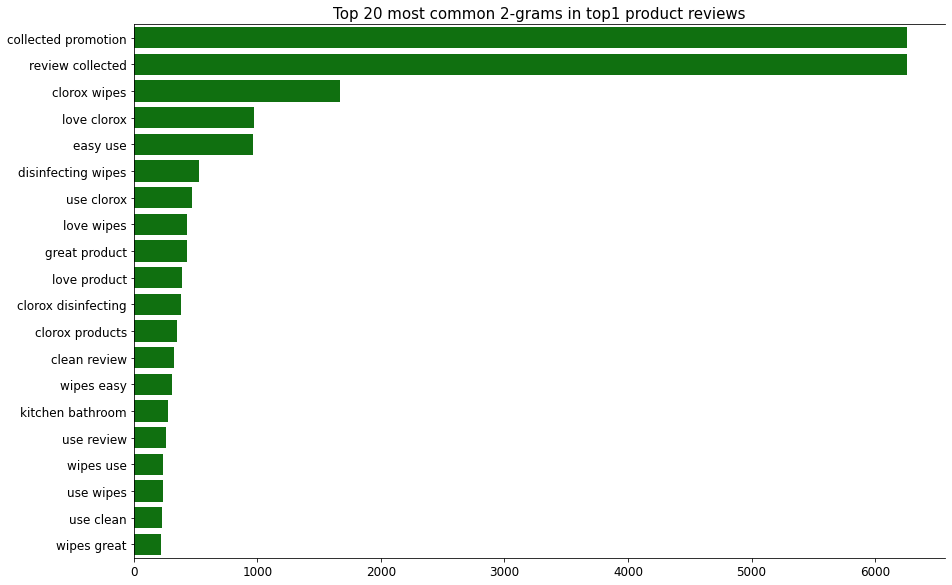

In [ ]:
ngram=2
new_ngrams=top_n_grams(data_rev_rat,20,ngram)

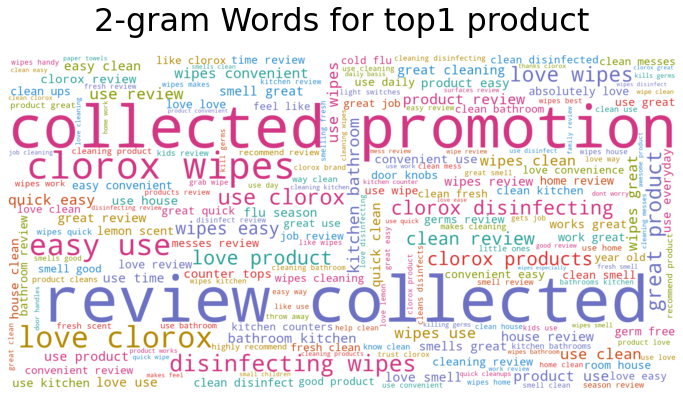

In [ ]:
from wordcloud import WordCloud 
word_cloud(new_ngrams,ngram)

In [ ]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)
rev_data= cv.fit_transform(df['reviews.text'][0:10000])

bow = pd.DataFrame(data = rev_data.toarray(), columns=cv.get_feature_names())

final_df = bow

print('count vec ',rev_data.shape)


y_target=df['reviews.rating'][0:10000].apply(lambda x: 2 if x >4  else 1) 
y_target.value_counts()


count vec  (10000, 7012)


2    7427
1    2573
Name: reviews.rating, dtype: int64

## Supervised Machine learning model to predict ratings

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, y_target, test_size=0.3,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7123333333333334


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, predicted)
score2 = precision_score(y_test, predicted,average='weighted')
score3 = recall_score(y_test, predicted,average='weighted')
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 0.71%
Precision score is: 0.7
Recall score is: 0.71


## Evaluating supervised machine learning model

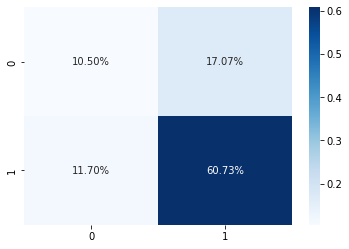

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

## Unsupervised Learning on review texts

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
#https://nbviewer.org/github/LucasTurtle/national-anthems-clustering/blob/master/Cluster_Anthems.ipynb

def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [ ]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [ ]:
# # Running Kmeans
from sklearn import cluster
k = 8
kmeans_results = run_KMeans(k, final_df)

# # Plotting Silhouette Analysis
# #silhouette(kmeans_results, final_df, plot=True)

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = cv.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

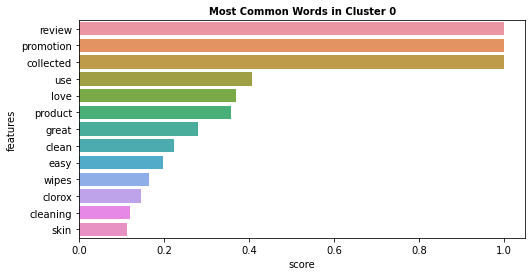

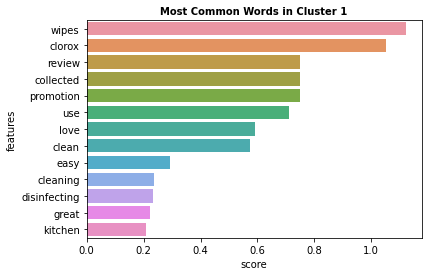

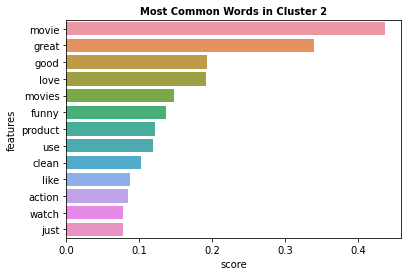

In [ ]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [ ]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

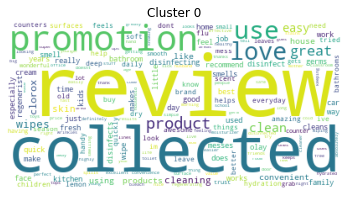

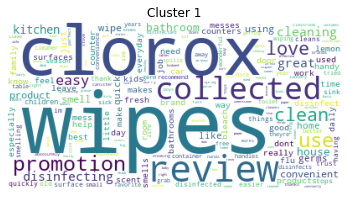

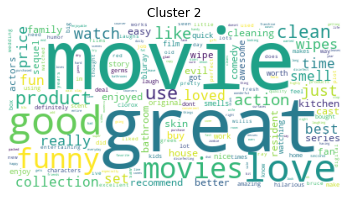

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = X_train.columns
generateWordClouds(centroids)

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('NLP_Assignment.ipynb')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWjWd3nEAgcqDCEwOu0dDVFANjYdusymYVgJLHaweZlWg0BkcX_avcI
